_Get Out_ has been one of the most talked about films in 2017 and as of April 2017 <a href="http://www.thefader.com/2017/04/04/get-out-original-screenplay-record" target="_blank">the highest grossing debut film based on an original screenplay in history</a>. We want to programmatically find out how _Get Out_ ranked amongst other 2017 American films and which films have earned the most revenue in 2017. This tutorial assumes most readers have basic working knowledge of Python. 

### Prequisites
- Install the following python packages and run them ideally in a <a href="http://python-guide-pt-br.readthedocs.io/en/latest/dev/virtualenvs/" target="_blank">virtualenv</a>.
    - config
    - requests
    - locale
    - pandas
    - matplotlib
 
- In addition to installing the above dependencies we will need to request an API key from [The Movie DB (TMDB)](https://www.themoviedb.org/). TMDB has a free API to programmatically access information about movies.

    - In order to request an API key from TMDB:
      1. <a href="https://www.themoviedb.org/account/signup" target="_blank">Create a free account</a>
      2. Check your e-mail to verify your account.
      3. Visit the <a href="https://www.themoviedb.org/settings/api" target="_blank">API Settings page</a> in your Account Settings and request an API key 
      4. You should now have an API key and be ready to go!
  

In [702]:
import config # to hide TMDB API keys
import requests # to make TMDB API calls
import locale # to format currency as USD 
locale.setlocale( locale.LC_ALL, '' )

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

api_key = config.tmdb_api_key # get TMDB API key from config.py file

If you plan on committing your project to GitHub or another public repository and need help setting up `config` you should read [this article](/hide-api-keys.html) about using `config` to hide API keys.

## Part 1: Determine the highest earning American films of 2017

In this section we will request **2017** data from TMDB, store the data we recieve as a `json` into a `dataframe` and then use `matplotlib` to visualize our data. 


### Make API Call to TMDB to return the data of interest
In order to get the highest earning films from TMDB an API request needs to be constructed to return films with a `primary_release_year` of 2017 sorted in descending order by revenue.

In [703]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2017&sort_by=revenue.desc')

In [704]:
highest_revenue = response.json() # store parsed json response

# uncomment the next line to get a peek at the highest_revenue json structure
# highest_revenue

highest_revenue_films = highest_revenue['results']

### Create dataframe from JSON returned from TMDB API call

Let's store the JSON data returned from our API call in a dataframe to store each film and its associated revenue.

In [705]:
# define column names for our new dataframe
columns = ['film', 'revenue']

# create dataframe with film and revenue columns
df = pandas.DataFrame(columns=columns)

Now to add the data to our dataframe we will need to loop through the data.

In [706]:
# for each of the highest revenue films make an api call for that specific movie to return the budget and revenue
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']] # store title and revenue in our dataframe    

Below is what the dataframe `head` (top 5 lines) looks like after iterating through the films our API call returned.

In [707]:
df.head()

,film,revenue
0,Beauty and the Beast,1221782049
1,The Fate of the Furious,1212583865
2,Guardians of the Galaxy Vol. 2,744784722
3,Logan,608674100
4,Kong: Skull Island,565151307


### Let's actually _see_ the data with matplotlib

We will create a horizontal bar chart using matplotlib to display the revenue earned for each film.

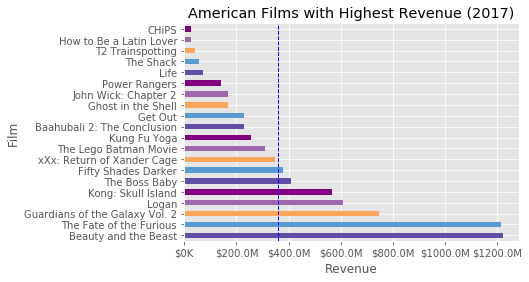

In [708]:
matplotlib.style.use('ggplot')
fig, ax = plt.subplots()
df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=df['film'], ax=ax)

#format xaxis in terms of currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

avg = df['revenue'].mean()

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

ax.set(title='American Films with Highest Revenue (2017)', xlabel='Revenue', ylabel='Film')

## Part 2: Determine the highest earning American films of all-time

In this section we will request **all-time** data from TMDB, store the data we recieve as a `json` into a `dataframe` and then use `matplotlib` to visualize our data. Our API call will be similar to the one we used in the previous section but sans `&primary_release_year=2017`.

### Requesting, formatting and storing API data

In [709]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=revenue.desc')
highest_revenue_ever = response.json()
highest_revenue_films_ever = highest_revenue_ever['results']

columns = ['film', 'revenue', 'budget', 'release_date']
highest_revenue_ever_df = pandas.DataFrame(columns=columns)

for film in highest_revenue_films_ever:
    # print(film['title'])
   
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    # print(film_revenue)

    # print(locale.currency(film_revenue['revenue'], grouping=True ))
    
    # Lord of the Rings duplicate w/ bad data was being returned  https://www.themoviedb.org/movie/454499-the-lord-of-the-rings
    # It's budget was $281 which is way too low for a top-earning film. Therefore in order to be added to dataframe the film 
    # budget must be greater than $281.
    
    if film_revenue['budget'] > 281:
        # print(film_revenue['budget'])
        # add film title, revenue, budget and release date to the dataframe
        highest_revenue_ever_df.loc[len(highest_revenue_ever_df)]=[film['title'],film_revenue['revenue'], (film_revenue['budget'] * -1), film_revenue['release_date']]

highest_revenue_ever_df.head()    
        

,film,revenue,budget,release_date
0,Avatar,2781505847,-237000000,2009-12-10
1,Star Wars: The Force Awakens,2068223624,-245000000,2015-12-15
2,Titanic,1845034188,-200000000,1997-11-18
3,The Avengers,1519557910,-220000000,2012-04-25
4,Jurassic World,1513528810,-150000000,2015-06-09


### Calculate the gross profit 
We can calculate the gross profit by subtracting total revenue from amount spent. Earlier we made the budget values negative therefore we need to add the revenue to the (negative) budget to get the gross profit which is effectively subtraction.

In [710]:
highest_revenue_ever_df['gross'] = highest_revenue_ever_df['revenue'] + highest_revenue_ever_df['budget']

What does the dataframe look like now?

In [711]:
highest_revenue_ever_df.head()

,film,revenue,budget,release_date,gross
0,Avatar,2781505847,-237000000,2009-12-10,2544505847
1,Star Wars: The Force Awakens,2068223624,-245000000,2015-12-15,1823223624
2,Titanic,1845034188,-200000000,1997-11-18,1645034188
3,The Avengers,1519557910,-220000000,2012-04-25,1299557910
4,Jurassic World,1513528810,-150000000,2015-06-09,1363528810


### Plotting data in matplotlib with horizontal bar charts and a scatter plot

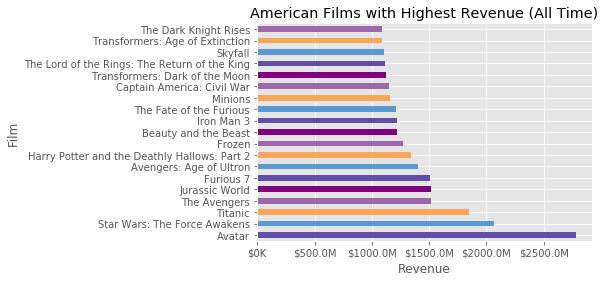

In [712]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=highest_revenue_ever_df['film'], ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)
ax.set(title='American Films with Highest Revenue (All Time)', xlabel='Revenue', ylabel='Film')

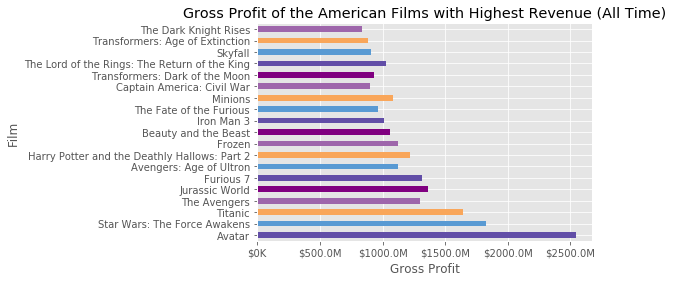

In [713]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind="barh", y='gross', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=highest_revenue_ever_df['film'], ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)
ax.set(title='Gross Profit of the American Films with Highest Revenue (All Time)', xlabel='Gross Profit', ylabel='Film')

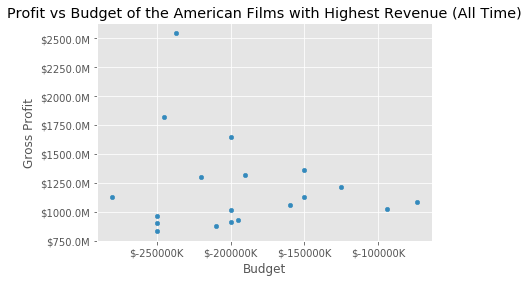

In [722]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind='scatter', y='gross', x='budget', ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
ax.set(title='Profit vs Budget of the American Films with Highest Revenue (All Time)', xlabel='Budget', ylabel='Gross Profit')


In [657]:
# Adding release year to dataframe
# highest_revenue_ever_df['year'] = pd.DatetimeIndex(highest_revenue_ever_df['release_date']).year
# print(highest_revenue_ever_df)

### Limitations

The above data and graphs do not account for inflation (the TMDB API returns by revenue unadjusted by inflation) therefore the earnings from more recent films are more weighted than their earlier counterparts. When looking at _all time_ data inflation should be adjusted for however when looking over a shorter time period adjusting for inflation might not be necessary. Older films would appear above if inflation was taken into account, as it is now, the oldest film on this list was _The Titanic_ in 1997.

_Cover photo is Chris Washington, played by Daniel Kaluuya, from Get Out.   Universal Pictures_